## Kmeans


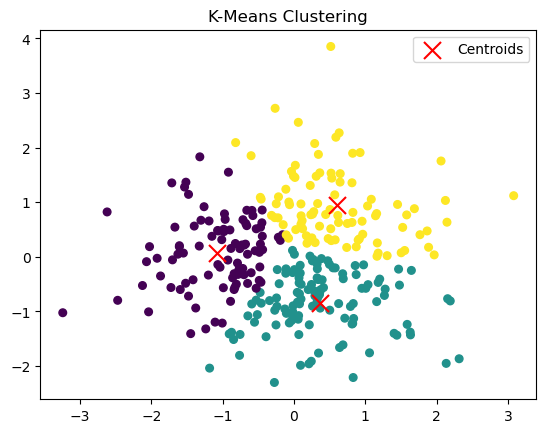

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)
data = np.random.randn(300, 2) 
def kmeans(data, k=3, max_iter=100):
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    for m in range(max_iter):
        distance_matrix = np.zeros((data.shape[0], 3))
        labels = np.zeros(data.shape[0])
        for i in range(distance_matrix.shape[0]):
            min_val = float('inf')
            for j in range(distance_matrix.shape[1]):
                distance_matrix[i][j] = np.sqrt((data[i][0] - centroids[j][0])**2 + (data[i][1] - centroids[j][1])**2)
                if distance_matrix[i][j] < min_val:
                    labels[i] = j
                    min_val = distance_matrix[i][j]
        new_centroids = np.zeros((k, data.shape[1]))
        for j in range(k):
            new_centroids[j] = np.mean(data[labels == j], axis=0)
        
        if np.all((new_centroids - centroids) < 1e-5):
            break

        centroids = new_centroids

    return centroids, labels
    
centroids, labels = kmeans(data, k=3, max_iter=10)

def plot_kmeans(data, centroids, labels):
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', s=30)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=150, label='Centroids')
    plt.title('K-Means Clustering')
    plt.legend()
    plt.show()

plot_kmeans(data, centroids, labels)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)
data = np.random.randn(300, 2)
df = pd.DataFrame(data, columns=['x', 'y'])

,x,y
0,0.496714,-0.138264
1,0.647689,1.523030
2,-0.234153,-0.234137
3,1.579213,0.767435
4,-0.469474,0.542560
...,...,...
295,0.071566,-0.477657
296,0.478980,0.333662
297,1.037540,-0.510016
298,-0.269875,-0.978764


## Use np.argmin and make use of  broadcast from numpy

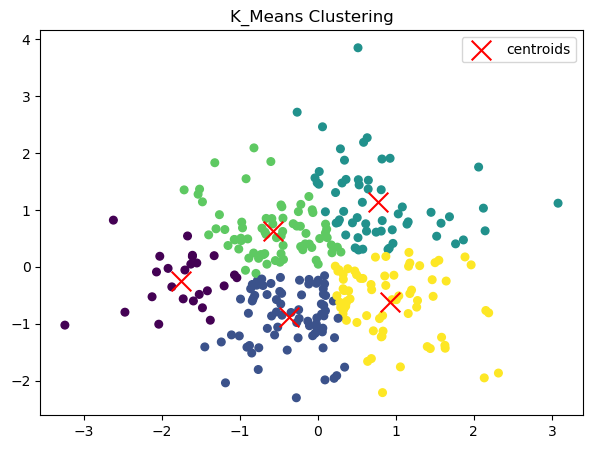

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)
data = np.random.randn(300, 2)
df = pd.DataFrame(data, columns=['x', 'y'])

def Kmeans(df, k, max_iter=100):
    centroids = df.sample(n=k).to_numpy()
    for i in range(max_iter):
                                               
        distances = np.sqrt(((df.values - centroids[:, np.newaxis])**2).sum(axis=-1))  ## broadcast
        labels = np.argmin(distances, axis= 0)
        new_centroids = np.array([df.values[labels == j].mean(axis=0) for j in range(k)])
        
        if np.all(new_centroids == centroids):
            break
        centroids = new_centroids
    return centroids, labels

k = 5
centroids, labels = Kmeans(df, k)

def plot_kmeans(df, centroids, labels):
    plt.figure(figsize=(7,5))
    plt.scatter(df.values[:,0], df.values[:,1], cmap='viridis', marker='o', s=30, c=labels)
    plt.scatter(centroids[:,0], centroids[:,1], c='red', s=200, marker='x', label='centroids')
    plt.legend()
    plt.title('K_Means Clustering')
    plt.show()

    
plot_kmeans(df, centroids, labels)


## KNNs using Numpy

In [248]:
import numpy as np

np.random.seed(42)
data = np.random.randn(100, 5)
labels = np.random.choice([0, 1, 2, 3, 4], size=100)


def knns(data, labels, new_data, n_neighbours=10):
    distance = np.sqrt(((data - new_data)**2).sum(axis=-1))
    neighbours = np.argsort(distance)[:n_neighbours]
    label_count = {}
    for i in neighbours:
        if labels[i] in label_count:
            label_count[labels[i]] += 1
        else:
            label_count[labels[i]] = 1
    
    predict = max(label_count, key=label_count.get)
    return predict

new_data = np.random.randn(1,5)
predict = knns(data, labels, new_data)
print(f'Predict of new_data: {predict}')

Predict of new_data: 4


## KNNs using Pandas

In [249]:
from collections import Counter
import pandas as pd
import numpy as np

np.random.seed(42)
data = np.random.randn(100, 5)
lables = np.random.choice([0, 1, 2, 3, 4], size=100)
df = pd.DataFrame(data, columns=['a','b','c','d','e'])
df['lables'] = lables

def knns(df, new_data, n_neighbours=10):
    train = df.drop('lables', axis=1)
    test = df['lables']
    distance = np.sqrt(((train.values - new_data)**2).sum(axis=-1))
    neighbours = np.argsort(distance)[:n_neighbours]
    predict = Counter(test.iloc[neighbours].values.flatten()).most_common()[0][0]
    return predict

new_data = np.random.randn(1,5)
predict = knns(df, new_data)
print(f'Prediction is: {predict}')

Prediction is: 4


## Gradient decent

In [262]:
np.random.seed(42)
X = 2 * np.random.rand(100)
y = 4 + 3 * X + np.random.randn(100)

In [263]:
y.shape

(100,)

 theta: [4.21509616 2.77011339]


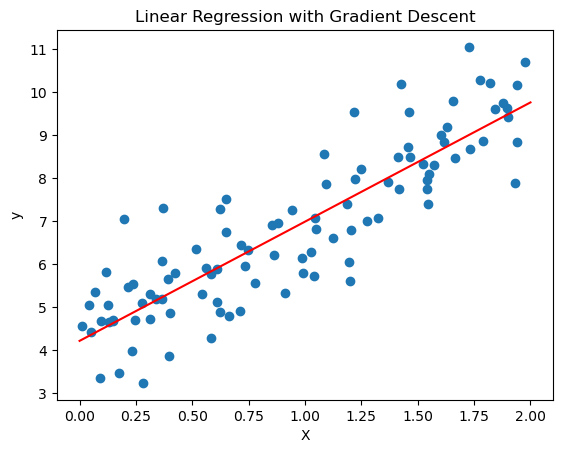

In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X[:, 0] + np.random.randn(100)


def gradient_descent(X, y, lr=0.1, n_iter=1000):
    m = len(y)
    X_b = np.c_[np.ones((m, 1)), X]  # 添加偏置项 x0 = 1
    theta = np.random.randn(2)
    for _ in range(n_iter):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta -= lr * gradients
    return theta


theta = gradient_descent(X, y)
print(f' theta: {theta}')


plt.scatter(X, y)
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta)
plt.plot(X_new, y_predict, 'r-')
plt.title('Linear Regression with Gradient Descent')
plt.xlabel('X')
plt.ylabel('y')
plt.show()


## Markov chain

In [251]:
import numpy as np
import pandas as pd


states = ['Sunny', 'Cloudy', 'Rainy']
transition_matrix = pd.DataFrame({
    'Sunny': [0.8, 0.1, 0.2],
    'Cloudy': [0.1, 0.6, 0.2],
    'Rainy': [0.1, 0.3, 0.6]
}, index=states)


initial_state = 'Sunny'


def markov_chain(transition_matrix, initial_state, steps):
    current_state = initial_state
    state_sequence = [current_state]
    for _ in range(steps):
        probabilities = transition_matrix.loc[current_state]
        current_state = np.random.choice(states, p=probabilities)
        state_sequence.append(current_state)
    return state_sequence


steps = 10
sequence = markov_chain(transition_matrix, initial_state, steps)
print('Sequence of weather conditions:')
print(sequence)


Sequence of weather conditions :
['Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Sunny', 'Rainy', 'Rainy']
